# DECISION TREE ALGORITHM.

Decision tree algorithm is a type of supervised machine learning model that classifies data by using true or false values to questions. It one of the simplest and most accurate model that when visualised gives a hierachial tree structure with three types of nodes ; root, internal node and leafs. Its a graphical representation showing all possible solutions for a given problem based on a condition. 

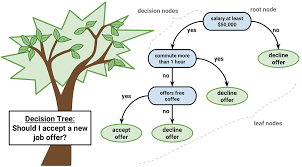

The **root node** sits at the top as a starting point as parent, it represents the whole dataset or population from which a decision will be made resulting to a split. The root is the most critical part as it sets the foundation for branching aimed at making separations that give birth to child nodes with the highest purity.  

**Decision/internal nodes** are decisions upon which datasets are split. They are test conducted based on the features of the dataset. A question is asked and then based on the answers provided, a tree is split further into sub-branches. A split is characterised by a feature that best separates the data according to certain criterion i.e informtaion gain(entropy), Gini Impurity, and variance reduction.

**Leaf Node** is a final ouput node that represent an outcome made. These terminal node represent a point upon which no further split in the dataset can be made, here the tree is considered as fully grown. For classification trees they represent classes while in regression thet represent contionous values often mean values of the target variable. 

**Feature selection** is an important step in decison trees where all possible splits are considered and one that result to best feature separation based on a criterion is selected. A decision node is split into subnodes also called child nodes. In classifiction data is separated into classes while in regression variance is reduced. 

Sometimes unneccessary branches can be removed by **pruning**. These are ones that have little to no impact on the accuracy of the model, this step improve the model generalisation abilities on new data and curbs overfitting.

Lets use this algorithm to predict voter turn out in the United States election.  

In [92]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, classification_report


(3112, 88)


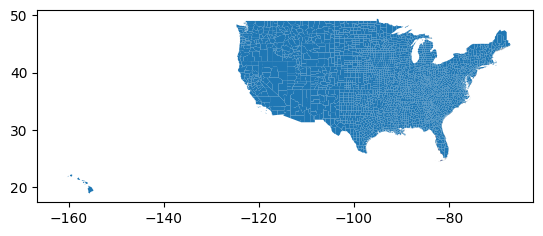

In [59]:
# Read and clean data.

# Read data 
data = gpd.read_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg')
data.plot()

print(data.shape)


In [61]:
# Rename columns 

data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)

print(data.columns)

Index(['county_fip', 'fips', 'name', 'population', 'population_persqmile',
       'sqmi', 'state_abbr', 'state_fips', 'state_name', 'county_FIPS',
       'totalvotes_2008', 'totalvotes_2012', 'totalvotes_2016',
       'totalvotes_2020', 'cvap_est_2008', 'cvap_est_2012', 'cvap_est_2016',
       'cvap_est_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', 'voter_turnout_dem_2008',
       'voter_turnout_dem_2012', 'voter_turnout_dem_2016',
       'voter_turnout_dem_2020', 'voter_turnout_gop_2008',
       'voter_turnout_gop_2012', 'voter_turnout_gop_2016',
       'voter_turnout_gop_2020', 'per_diff_dem_vs_gop_2008',
       'per_diff_dem_vs_gop_2012', 'per_diff_dem_vs_gop_2016',
       'per_diff_dem_vs_gop_2020', 'rawdiff_dem_vs_gop_2008',
       'rawdiff_dem_vs_gop_2012', 'rawdiff_dem_vs_gop_2016',
       'rawdiff_dem_vs_gop_2020', 'winning_party_2008', 'winning_party_2008',
       'winning_party_2008', 'winning_party_2008', 'aggregatio', 

### Model 1. 

In this model we will be using only three parameters , median age, income and percentage of voters with diploma certificates.
 


In [63]:
# Subset data, get recquired columns 

data1 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020']]
data1

,2022_median_age,2022_per_capitalincome,perc_2022_age_25+_no_diploma/highschool,voter_turnout_2020
0,39.1,32233.0,7.53,0.632502
1,43.3,37891.0,5.77,0.627867
2,40.4,22826.0,16.10,0.535949
3,39.8,25152.0,12.53,0.542704
4,41.3,28176.0,9.49,0.632245
...,...,...,...,...
3107,35.5,37688.0,3.64,0.555581
3108,39.1,58009.0,1.93,0.855977
3109,35.9,32885.0,3.11,0.665892
3110,43.2,30448.0,4.82,0.672560


In [17]:
# Check missing values 

data1.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
dtype: int64

In [18]:
# Define training features
X = data1.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data1[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  
0                                     7.53  
1                                     5.77  
2                                    16.10  
3                                    12.53  
4                                     9.49  

 Labels : 
    voter_turnout_2020
0            0.632502
1            0.627867
2            0.535949
3            0.542704
4            0.632245


In [33]:
# Fit a deciosion tree regressor to the dataset 

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)
 
# Create a regressor object 
rg = DecisionTreeRegressor()

# Train the model, fit the model ,gain knowledge of the data 
rg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [34]:
# Predict values using test and train data 

y_pred1 = rg.predict(X_train)
y_pred = rg.predict(X_test)

In [35]:
# Evaluate the model using Mean Absolute Error. 
# This error calculates the difference between actual value and predicted values by averaging the distance between 
# each pair of values. 

t1 = mean_absolute_error(y_test, y_pred)
t2 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t1}')
print(f'MAE of Decision Tree Regressor on train data : {t2}')

MAE of Decision Tree Regressor on test set : 0.06416114381173761
MAE of Decision Tree Regressor on train data : 0.027578337567560684


The MAE on the training set is 0.000 meaning its overfitting, while the test set MAE is better(low MEA) meaning its generalising new data well. Lets apply pre-pruning to the tree by setting the maximum depth which limits the depth of trees and observe the outcome.

We expect a higher MEA on the training set while the test set improves.  

In [48]:
# Create a regressor object maximum tree depth of 11
rg2 = DecisionTreeRegressor(random_state=8, max_depth=11)

# Train the model, fit the model ,gain knowledge of the data 
rg2.fit(X_train, y_train)

# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t3 = mean_absolute_error(y_test, y_pred)
t4 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t3}')
print(f'MAE of Decision Tree Regressor on train data : {t4}')

MAE of Decision Tree Regressor on test set : 0.06409024549629863
MAE of Decision Tree Regressor on train data : 0.027578337567560684


Tree depth did not significantly impact MEA on test data but had minimal increase on training data illustrating that it slightly did not memorise data.  

### Feature Importance.

Lets evaluate the impact of each feature in the dataset, how did they contribute to the model. This value usually sums to 1. 0 means the feature was nit used at all while 1 means it perfectly predicted the target variable. 


In [49]:
print("Feature importances:\n{}".format(rg2.feature_importances_))

Feature importances:
[0.26900879 0.5046247  0.22636651]


The 'perc_2022_age_25+_no_diploma/highschool' and '2022_per_capitalincome' variables had the most importance meaning they were the most usefull in predicting voter turn out. 

### Tune Hyperparameters with GridSearchCV.

We can tune various parameters to find the optimal values for our model. Because there is no way of knowing in advance the best parameters, we have to give it a try with different values every time. This manual operation is very tiresome and time cobnsuming, and thats where GridSearchCV comes in handy. It automates this process by looping through the predefined parameters, fit our estimator and selects the best performing among them. 


In [52]:

parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg3 = DecisionTreeRegressor()
rg3 = GridSearchCV(rg3, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [53]:
# Get the best parameters 

rg3.best_params_

{'max_depth': 6, 'max_features': 12, 'max_leaf_nodes': 60}

In [54]:
# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t5 = mean_absolute_error(y_test, y_pred)
t6 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t5}')
print(f'MAE of Decision Tree Regressor on train data : {t6}')

MAE of Decision Tree Regressor on test set : 0.06409024549629863
MAE of Decision Tree Regressor on train data : 0.027578337567560684


### Model 2. 

Lets add more variables to our model. 



In [81]:
data2 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020', 
               'population_persqmile', 'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
                'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
              'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income', 'maritalsta']]

# Add 'state_abbr' column later and encode 


In [82]:
# Check missing values 

data2.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
population_persqmile                       0
voter_turnout_2008                         0
voter_turnout_2012                         0
voter_turnout_2016                         0
perc_2022_income_below_povertyline         0
2022_avg_credit_card_debt                  0
perc_2022_age_25+_with_bachelors_degree    0
2022_avg_disposable_income                 0
maritalsta                                 0
dtype: int64

In [83]:
# Define training features
X = data2.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data2[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  population_persqmile  \
0                                     7.53                  97.3   
1                                     5.77                 141.9   
2                                    16.10                  27.9   
3                                    12.53                  35.6   
4                                     9.49                  90.9   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   
2            0.556459            0.558418            0.523712   
3            0.500521           

In [84]:
print(data2.dtypes)

2022_median_age                            float64
2022_per_capitalincome                     float64
perc_2022_age_25+_no_diploma/highschool    float64
voter_turnout_2020                         float64
population_persqmile                       float64
voter_turnout_2008                         float64
voter_turnout_2012                         float64
voter_turnout_2016                         float64
perc_2022_income_below_povertyline         float64
2022_avg_credit_card_debt                  float64
perc_2022_age_25+_with_bachelors_degree    float64
2022_avg_disposable_income                 float64
maritalsta                                 float64
dtype: object


In [85]:
parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg4 = DecisionTreeRegressor()
rg4 = GridSearchCV(rg4, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg4.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [86]:
# Get the best parameters 
rg4.best_params_

{'max_depth': 7, 'max_features': 10, 'max_leaf_nodes': 32}

In [87]:
# Predict values using test and train data 
y_pred1 = rg4.predict(X_train)
y_pred = rg4.predict(X_test)

# MEA
t7 = mean_absolute_error(y_test, y_pred)
t8 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t7}')
print(f'MAE of Decision Tree Regressor on train data : {t8}')

MAE of Decision Tree Regressor on test set : 0.03055027873990952
MAE of Decision Tree Regressor on train data : 0.027788665587258395


In [88]:
X.columns

Index(['2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_no_diploma/highschool', 'population_persqmile',
       'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
       'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'maritalsta'],
      dtype='object')

In [89]:
rg4.best_estimator_.feature_importances_

array([0.00210127, 0.00599625, 0.00366588, 0.00626663, 0.0135493 ,
       0.00353985, 0.95007402, 0.00534025, 0.00157004, 0.00407997,
       0.00381655, 0.        ])

In [90]:
# Feature importance 

hd = list(X.columns)
for i, f in zip(hd, rg4.best_estimator_.feature_importances_):
     print(i,round(f*100,2))

2022_median_age 0.21
2022_per_capitalincome 0.6
perc_2022_age_25+_no_diploma/highschool 0.37
population_persqmile 0.63
voter_turnout_2008 1.35
voter_turnout_2012 0.35
voter_turnout_2016 95.01
perc_2022_income_below_povertyline 0.53
2022_avg_credit_card_debt 0.16
perc_2022_age_25+_with_bachelors_degree 0.41
2022_avg_disposable_income 0.38
maritalsta 0.0


In [91]:
# Feature importance 

features = pd.DataFrame(rg4.best_estimator_.feature_importances_, index=X.columns)
features

# Plot bar chart
sns.barplot(x = 'who',
            y = 'fare',
            data = df)

,0
2022_median_age,0.002101
2022_per_capitalincome,0.005996
perc_2022_age_25+_no_diploma/highschool,0.003666
population_persqmile,0.006267
voter_turnout_2008,0.013549
voter_turnout_2012,0.003540
voter_turnout_2016,0.950074
perc_2022_income_below_povertyline,0.005340
2022_avg_credit_card_debt,0.001570
perc_2022_age_25+_with_bachelors_degree,0.004080


In [93]:
features.columns 


RangeIndex(start=0, stop=1, step=1)